In [1]:
import numpy as np
import random
from deap import base, creator, tools
import matplotlib.pyplot as plt

# Esercizio 3

Write a Python program that optimizes the Griewank Problem through two evolutionary algorithms: a genetic algorithm and the differential evolution.

$$ f(\mathbf{x}) = f(x_1, x_2, \ldots, x_n) = 1 + \sum_{i=0}^{n-1} \frac{x_i^2}{4000} - \prod_{i=0}^{n-1} cos\left(\frac{x_i}{\sqrt{i}}\right)$$

In [2]:
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

In [4]:
IND_SIZE=10
TOURN_SIZE = 3

toolbox = base.Toolbox()
toolbox.register('attr_float', lambda: random.uniform(-600,600))
#individuals
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_float, n=IND_SIZE) 
#population
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

#Operators
#Crossover
toolbox.register('mate', tools.cxTwoPoint)
#Mutation
toolbox.register('mutate', tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
#Selection
toolbox.register('select', tools.selTournament, tournsize=TOURN_SIZE)
toolbox.register('select_r', tools.selRoulette)

In [5]:
#Evaluate function
def evaluate(individual):
    sommatoria = 0
    produttoria = 1
    for i in individual:
        cos = np.cos(i/(individual.index(i)+1))
        sommatoria += i**2
        produttoria = produttoria * cos
    return 1+sommatoria/4000-produttoria
        

toolbox.register('evaluate', evaluate)

#Statistical Features
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [87]:
def GA(POP_SIZE, CXPB, MUTPB, NGEN, ev_limit, stats):
    evaluation_no = 0
    while evaluation_no<=ev_limit:
        #Defininf Hall of Fame
        hof = tools.HallOfFame(1)
    
        #Creating the population
    
        pop = toolbox.population(n=POP_SIZE)
        #print(pop)

        #Defining the Logbook
        logbook = tools.Logbook()
        logbook.header = ["gen", "nevals"] + (stats.fields if stats else[])
    
    

        #Evaluate the entire population
        fitness = list(map(toolbox.evaluate, pop))
        for ind, fit in zip(pop, fitness):
            ind.fitness.values = [fit]
            evaluation_no += 1


        hof.update(pop) if stats else {}

        record = stats.compile(pop) if stats else {}
        logbook.record(gen=0, nevals=len(pop), **record)
    

        for g in range(NGEN):
            #print('Generation Number ', g, 'Population ', pop)
            #Select the next generation individuals
            offspring = toolbox.select(pop, len(pop))
            #Clone the selected individuals
            offspring = list(map(toolbox.clone, offspring))

            #Apply crossover and mutation on the offspring
            for child1, child2 in zip(offspring[::2],offspring[1::2]):
                if random.random() < CXPB:
                    toolbox.mate(child1,child2)
                    del child1.fitness.values
                    del child2.fitness.values

            for mutant in offspring:
                if random.random() < MUTPB:
                    toolbox.mutate(mutant)
                    del mutant.fitness.values

            #Evaluate the individuals with an invalid fitness
            invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
            fitness = list(map(toolbox.evaluate, invalid_ind))
            for ind, fit in zip(invalid_ind, fitness):
                ind.fitness.values = [fit]
                evaluation_no += 1
                if evaluation_no==ev_limit:
                    return pop, logbook
                    print("Process finished after: ", evaluation_no, "evaluations, stopped at the limit")
                    break

            if hof is not None:
                hof.update(offspring)
                #print(hof)

            #The population in entirely replaced by the offspring
            pop[:] = tools.selBest(offspring, POP_SIZE-1)
            pop.append(hof[0])


            record = stats.compile(pop) if stats else{}
            #print(record)
            logbook.record(gen=g+1, nevals=len(invalid_ind), **record)
            
            
        
        
            
        
        

In [88]:
GA_exe = GA(POP_SIZE=10,CXPB=0.9,MUTPB=0.3,NGEN=250, ev_limit=200, stats=stats)
GA_exe2 = GA(POP_SIZE=10,CXPB=0.9,MUTPB=0.3,NGEN=250, ev_limit=500, stats=stats)
GA_exe3 = GA(POP_SIZE=10,CXPB=0.9,MUTPB=0.3,NGEN=250, ev_limit=1000, stats=stats)

def iterate(f):
    sum = 0
    for i in range(15):
        sum += f[1][len(f[1])-1]['min']
    return sum/15

means = [iterate(GA_exe), iterate(GA_exe2), iterate(GA_exe3)]
print(means)

[110.6130682830112, 115.94888368666035, 159.38456833101856]


In [89]:
GA_exe[1]

[{'gen': 0,
  'nevals': 10,
  'avg': 380.44941685249825,
  'std': 98.94523104662669,
  'min': 256.18666915774287,
  'max': 572.9125981574954},
 {'gen': 1,
  'nevals': 10,
  'avg': 273.33773406832364,
  'std': 49.589722118229425,
  'min': 189.71621473007502,
  'max': 336.4938424837821},
 {'gen': 2,
  'nevals': 10,
  'avg': 205.31577236895328,
  'std': 42.40304653657067,
  'min': 163.77951726586357,
  'max': 314.7735705862947},
 {'gen': 3,
  'nevals': 10,
  'avg': 171.02106642820252,
  'std': 17.593373454476218,
  'min': 148.202512444207,
  'max': 200.27982503609633},
 {'gen': 4,
  'nevals': 8,
  'avg': 149.5230453010716,
  'std': 17.488193724811723,
  'min': 118.62588731113269,
  'max': 174.14492057330037},
 {'gen': 5,
  'nevals': 10,
  'avg': 129.56146516283437,
  'std': 18.05858439935519,
  'min': 111.4799042557971,
  'max': 155.60682072130754},
 {'gen': 6,
  'nevals': 10,
  'avg': 111.56334472002581,
  'std': 0.1493340223223167,
  'min': 111.37799065756482,
  'max': 111.7405914331959

In [90]:
GA_exe2[1]

[{'gen': 0,
  'nevals': 10,
  'avg': 301.1266531228747,
  'std': 100.94310983532034,
  'min': 138.12978367241425,
  'max': 530.6331216665543},
 {'gen': 1,
  'nevals': 7,
  'avg': 197.220539837503,
  'std': 47.93381796678653,
  'min': 138.12978367241425,
  'max': 261.2439589011399},
 {'gen': 2,
  'nevals': 8,
  'avg': 154.23064568586523,
  'std': 37.872608102455516,
  'min': 118.77227198229903,
  'max': 228.59175755893781},
 {'gen': 3,
  'nevals': 10,
  'avg': 128.45791114167488,
  'std': 9.678806809019179,
  'min': 118.77227198229903,
  'max': 138.1471101891166},
 {'gen': 4,
  'nevals': 6,
  'avg': 122.64548332581099,
  'std': 7.742151823755304,
  'min': 118.77227198229903,
  'max': 138.12978367241425},
 {'gen': 5,
  'nevals': 10,
  'avg': 118.77227198229905,
  'std': 1.4210854715202004e-14,
  'min': 118.77227198229903,
  'max': 118.77227198229903},
 {'gen': 6,
  'nevals': 8,
  'avg': 118.77227198229905,
  'std': 1.4210854715202004e-14,
  'min': 118.77227198229903,
  'max': 118.7722719

In [91]:
GA_exe3[1]

[{'gen': 0,
  'nevals': 10,
  'avg': 298.5003294750956,
  'std': 66.37484934180056,
  'min': 191.21284432835066,
  'max': 449.01719828038097},
 {'gen': 1,
  'nevals': 8,
  'avg': 230.86338407317606,
  'std': 50.55919337963229,
  'min': 162.38956848408563,
  'max': 299.93148818560525},
 {'gen': 2,
  'nevals': 10,
  'avg': 173.22517896208186,
  'std': 17.49106957414804,
  'min': 162.38730842366144,
  'max': 213.10364169636625},
 {'gen': 3,
  'nevals': 10,
  'avg': 162.38180563266476,
  'std': 0.011413229708519136,
  'min': 162.35944064788194,
  'max': 162.38956848408563},
 {'gen': 4,
  'nevals': 10,
  'avg': 162.36520622388915,
  'std': 0.017969887760915182,
  'min': 162.33556922271796,
  'max': 162.38730842366144},
 {'gen': 5,
  'nevals': 8,
  'avg': 162.3442873127587,
  'std': 0.01391042318979589,
  'min': 162.33556922271796,
  'max': 162.37500727279723},
 {'gen': 6,
  'nevals': 9,
  'avg': 162.3317177922801,
  'std': 0.00816347799916959,
  'min': 162.3154246361556,
  'max': 162.337344

In [92]:
GA_exe[1][0]['min'], GA_exe2[1][0]['min'], GA_exe3[1][0]['min']
#GA_exe[1][len(GA_exe)]['min'], GA_exe2[1][len(GA_exe2)]['min'], GA_exe3[1][len(GA_exe3)]['min']

(256.18666915774287, 138.12978367241425, 191.21284432835066)

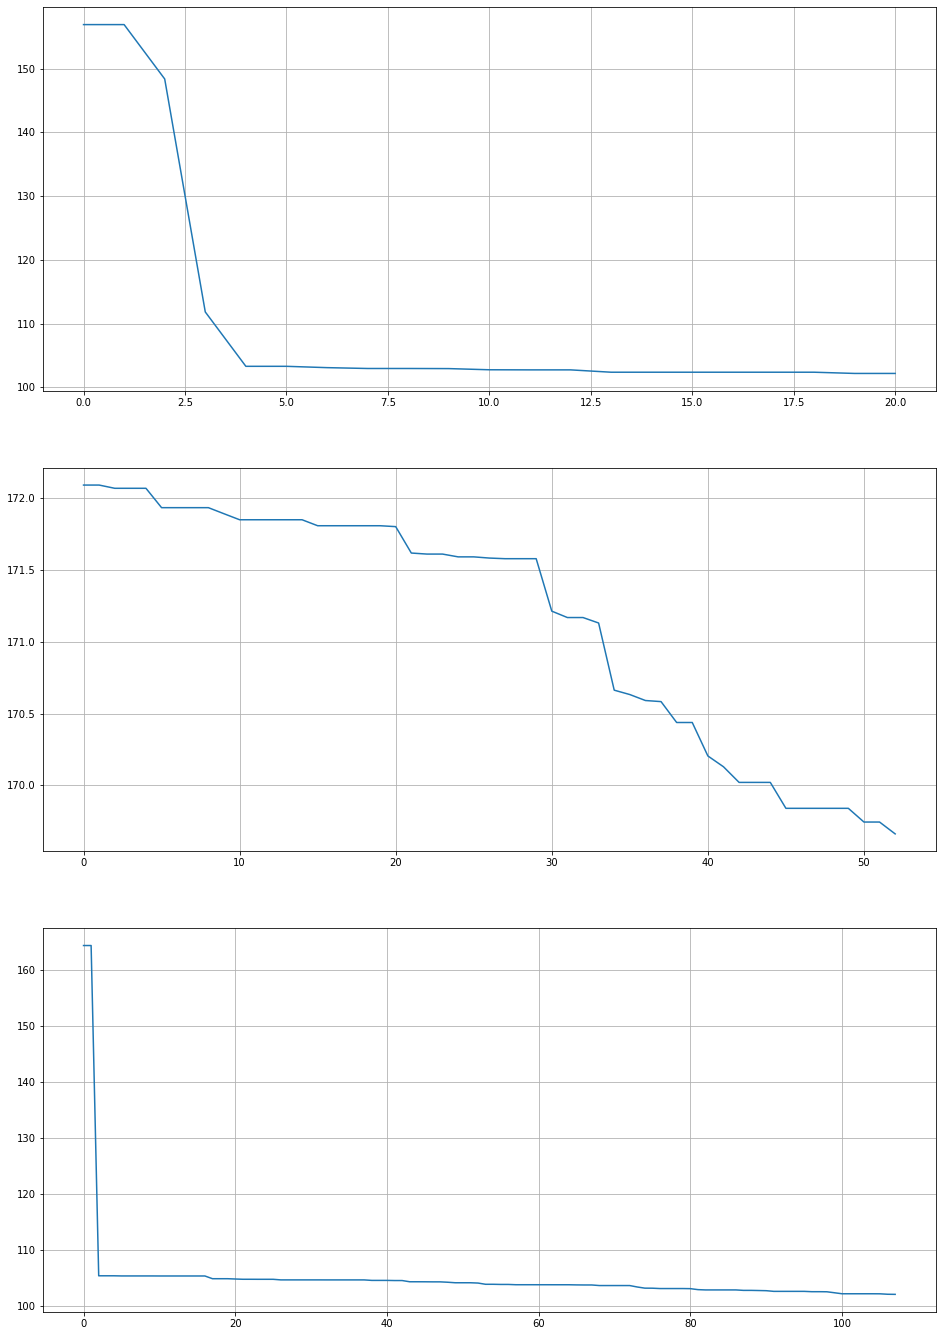

In [86]:
min_values = [GA_exe[1][i]['min'] for i in range(len(GA_exe[1]))]
ngen = [i for i in range(len(GA_exe[1]))]
min_values2 = [GA_exe2[1][i]['min'] for i in range(len(GA_exe2[1]))]
ngen2 = [i for i in range(len(GA_exe2[1]))]
min_values3 = [GA_exe3[1][i]['min'] for i in range(len(GA_exe3[1]))]
ngen3 = [i for i in range(len(GA_exe3[1]))]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,24))
ax1.plot(ngen, min_values)
ax2.plot(ngen2, min_values2)
ax3.plot(ngen3, min_values3)
ax1.grid()
ax2.grid()
ax3.grid()
plt.show()